In [1]:
# Importnecessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import  lightgbm
import catboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import streamlit as st


In [2]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display first five rows of the dataset
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Display last five  rows of the dataset
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
#info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# descriptive statistics for data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# list of columns in  data
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#shape of the data
data.shape

(284807, 31)

In [8]:
#info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027

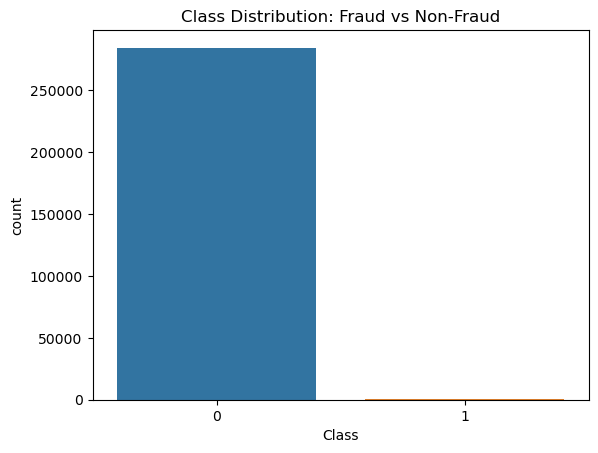

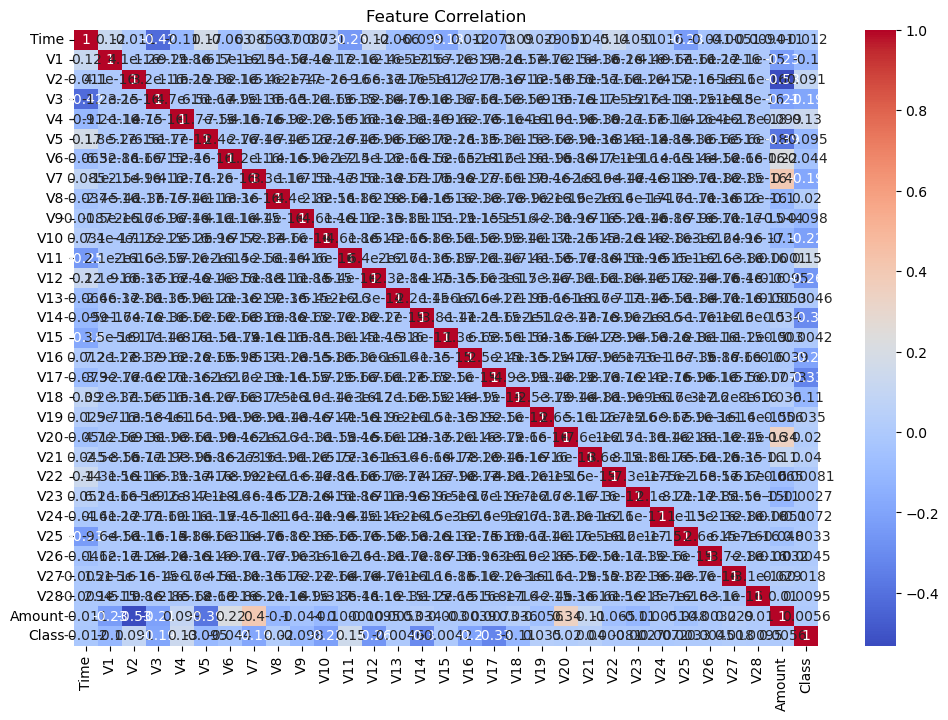

In [9]:

import seaborn as sns
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


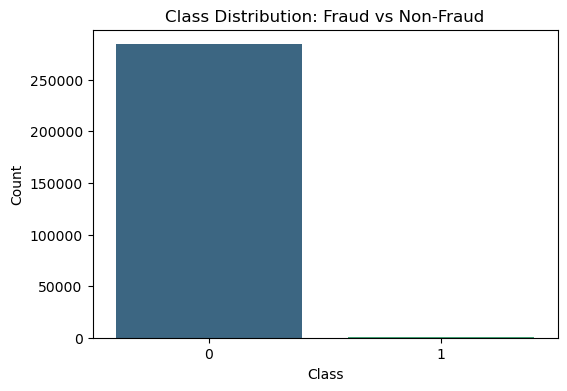

In [10]:
# Class distribution (Fraud vs Non-Fraud)
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


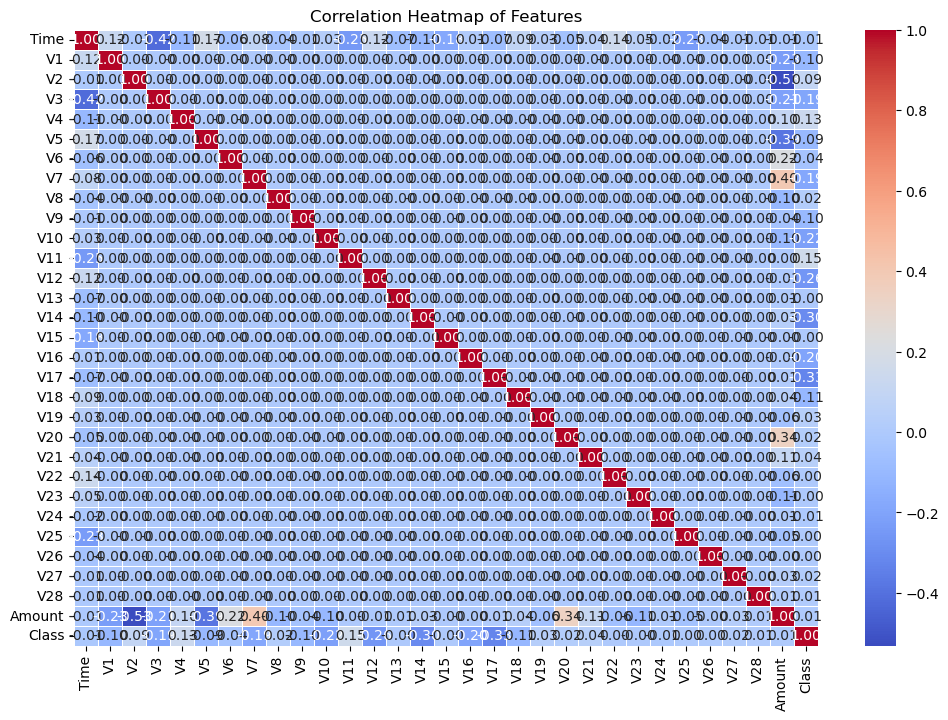

In [11]:
# Correlation heatmap to understand relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


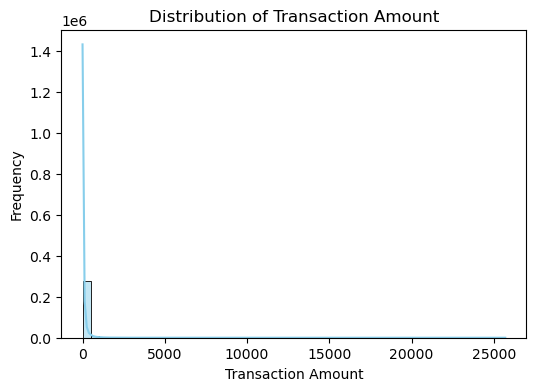

In [12]:
# Distribution of Transaction Amount (Visualize if it's skewed or has outliers)
plt.figure(figsize=(6, 4))
sns.histplot(data['Amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


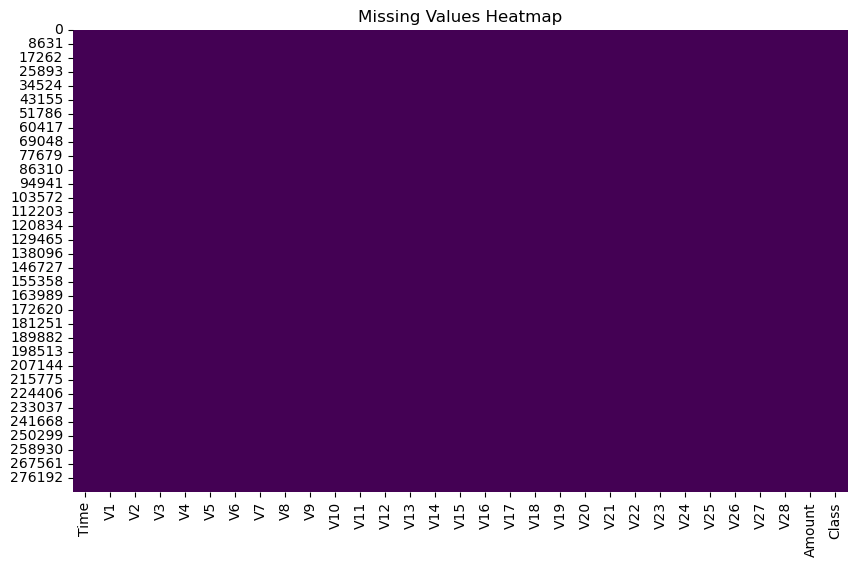

In [13]:
# Check for missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


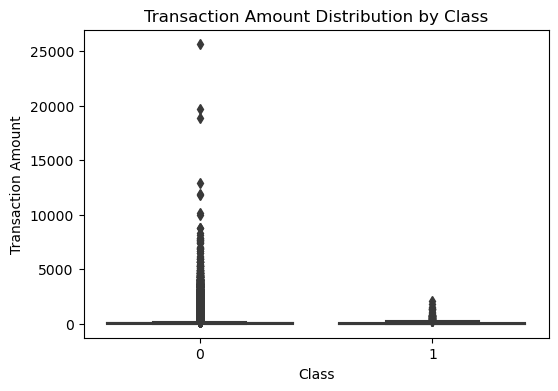

In [14]:
# Box plot to show the distribution of Transaction Amount for Fraud and Non-Fraud cases
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=data, palette='viridis')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()



In [15]:
# Log transformation to reduce skewness in monetary value
data['log_amount'] = np.log1p(data['Amount'])

In [16]:
# Convert 'Time' (seconds from first transaction) to hour of the day
data['hour'] = (data['Time'] // 3600) % 24

In [17]:
# Transaction speed: Transactions per hour
data['transaction_rate'] = data.groupby('hour')['hour'].transform('count')

# Feature interaction: Multiply important V-features with log_amount
for col in ['V1', 'V2', 'V3', 'V4', 'V10', 'V14']:
    data[f'{col}_x_logAmt'] = data[col] * data['log_amount']

In [18]:
# Drop low-variance features (if any)
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(data.drop(['Class'], axis=1))


In [19]:
selector

VarianceThreshold(threshold=0.01)

In [20]:
# Correlation Filtering
# Remove features with high correlation (>0.9) to reduce multicollinearity
corr_matrix = data.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]
data.drop(columns=to_drop, inplace=True)


In [21]:
# 3. Separate target
X = data.drop('Class', axis=1)
y = data['Class']

In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,log_amount,hour,transaction_rate,V1_x_logAmt,V2_x_logAmt,V3_x_logAmt,V4_x_logAmt,V10_x_logAmt,V14_x_logAmt
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,5.014760,0.0,7695,-6.819107,-0.364980,12.719170,6.911118,0.455311,-1.560440
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,1.305626,0.0,7695,1.556120,0.347493,0.217361,0.585122,-0.218006,-0.187713
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,5.939276,0.0,7695,-8.067640,-7.959599,10.531580,2.255616,1.233248,-0.985599
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,4.824306,0.0,7695,-4.661590,-0.893587,8.649948,-4.164781,-0.265105,-1.389032
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,4.262539,0.0,7695,-4.937014,3.741387,6.601470,1.717948,3.210009,-4.772636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.77,0.570980,23.0,10938,-6.783875,5.750783,-5.615460,-1.180018,2.487284,2.641889
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,24.79,3.249987,23.0,10938,-2.381554,-0.179011,6.613820,-2.400403,-3.171747,-2.194206
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,67.88,4.232366,23.0,10938,8.124301,-1.275016,-13.753665,-2.360933,-2.051774,-2.161054
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,10.00,2.397895,23.0,10938,-0.576550,1.272042,1.684546,1.654066,-0.957062,1.078152


In [23]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [56]:
print(y==1) # fraud 

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Name: Class, Length: 284807, dtype: bool


In [57]:
print(y==0)

#0 -----> not fraud

0         True
1         True
2         True
3         True
4         True
          ... 
284802    True
284803    True
284804    True
284805    True
284806    True
Name: Class, Length: 284807, dtype: bool


In [24]:
# 4. Train-Test Split (Stratified to preserve class distribution)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [25]:
#5.Scale down the features into a same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
!pip install -U scikit-learn imbalanced-learn


In [27]:
conda update scikit-learn imbalanced-learn



Note: you may need to restart the kernel to use updated packages.



PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\Users\bandi\anaconda3
  package name: scikit-learn




In [28]:
# 6. Handle Imbalance (Apply ONLY on training data)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_bal).value_counts())

Before SMOTE: 0    227451
1       394
Name: Class, dtype: int64
After SMOTE: 0    227451
1    227451
Name: Class, dtype: int64


# FEATURE SCALING

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k best features (you can try different values for k)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_bal, y_train_bal)
X_test_selected = selector.transform(X_test_scaled)  # Scale test data before selection


In [30]:
X_train_selected

array([[-8.94051557e-01, -4.67283725e-01,  1.28137638e+00, ...,
         4.04446404e-01, -9.07403516e-01, -5.51550700e-02],
       [-2.01830171e+00,  1.75133177e-01,  4.11208797e-02, ...,
        -8.61271777e-01, -3.21276918e-01,  3.01505889e-01],
       [ 4.70114301e-01, -7.00918274e-01,  6.37611546e-05, ...,
         1.28615964e+00, -8.58774965e-01,  1.87793991e-01],
       ...,
       [-2.06576968e+00,  1.56921505e+00, -1.56356818e+00, ...,
        -1.83081455e+00, -1.61100113e+00, -3.94758052e+00],
       [-3.68961992e+00,  2.81298441e+00, -8.50027158e-01, ...,
        -5.82195913e+00, -7.24603110e+00, -2.06083771e+00],
       [-1.72563653e+01,  4.45886057e+00, -3.46373745e+00, ...,
        -6.99265781e+00, -1.47033440e+01, -9.96413579e+00]])

In [31]:
# Too see selected feature names: 
selected_features = selector.get_support(indices=True)
print("Selected Features:", X_train.columns[selected_features].tolist())


Selected Features: ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V14_x_logAmt']


In [32]:
from sklearn.ensemble import IsolationForest

iso_model = IsolationForest(contamination=0.001, random_state=42)
iso_model.fit(X_train_bal)

# Predict: -1 is fraud
iso_preds = iso_model.predict(X_test_scaled)
iso_preds = [1 if p == -1 else 0 for p in iso_preds]



In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_bal, y_train_bal)

xgb_preds = xgb.predict(X_test_scaled)
print(classification_report(y_test, xgb_preds))

y_proba = xgb.predict_proba(X_test_scaled)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


C:\Users\bandi\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.83      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9829342189886647


In [67]:
X_train_bal.shape

(454902, 39)

In [34]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train_bal,y_train_bal)

log_preds = log_model.predict(X_test_scaled)
print(classification_report(y_test,log_preds))

y_proba = log_model.predict_proba(X_test_scaled)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))




              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC-AUC Score: 0.9694988328758627


In [35]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score

lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_bal, y_train_bal)

lgbm_preds = lgbm.predict(X_test_scaled)
print(classification_report(y_test, lgbm_preds))

lgbm_proba = lgbm.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, lgbm_proba))


[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9945
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\bandi\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\bandi\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.83      0.74        98

    accuracy                           1.00     56962
   macro avg       0.83      0.91      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9557989416926027


In [36]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

catboost = CatBoostClassifier(iterations=500, random_state=42, verbose=0)
catboost.fit(X_train_bal, y_train_bal)

catboost_preds = catboost.predict(X_test_scaled)
print(classification_report(y_test, catboost_preds))

catboost_proba = catboost.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, catboost_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.85      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9760073803015861


In [37]:
#impact that was shown by me 

# y_test -> true labels
# y_pred -> predicted labels from  model (e.g., log_preds)
# Let's say:
# False Negative (missed fraud) costs $500
# False Positive (flagging legit transaction) costs $5

# Step 1: Get confusion matrix
cm = confusion_matrix(y_test, log_preds)
tn, fp, fn, tp = cm.ravel()

# Step 2: Print classification report
print("Classification Report:")
print(classification_report(y_test, log_preds))

# Step 3: Assign cost values
cost_fp = 5    # Cost of flagging a legit user
cost_fn = 500  # Cost of missing a fraud

# Step 4: Calculate total cost
total_cost = (fp * cost_fp) + (fn * cost_fn)

# Step 5: Print detailed impact
print(f"\nConfusion Matrix: \n{cm}")
print(f"False Positives (FP): {fp} ➤ Cost: ${fp * cost_fp}")
print(f"False Negatives (FN): {fn} ➤ Cost: ${fn * cost_fn}")
print(f"✅ Total Estimated Cost of Errors: ${total_cost}")

# Optional business insight
if fn > 0:
    saved_cost = fn * cost_fn
    print(f"\n Insight: Reducing FN by {fn} cases would save ≈ ${saved_cost}/month.")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


Confusion Matrix: 
[[55308  1556]
 [    8    90]]
False Positives (FP): 1556 ➤ Cost: $7780
False Negatives (FN): 8 ➤ Cost: $4000
✅ Total Estimated Cost of Errors: $11780

 Insight: Reducing FN by 8 cases would save ≈ $4000/month.


In [39]:
false_negatives = ((y_test == 1) & (catboost_preds == 0)).sum()
estimated_cost = false_negatives * 500  # ₹500 loss per FN

print(f"False Negatives: {false_negatives}")
print(f"Estimated Monthly Loss: ₹{estimated_cost:,}")


False Negatives: 15
Estimated Monthly Loss: ₹7,500


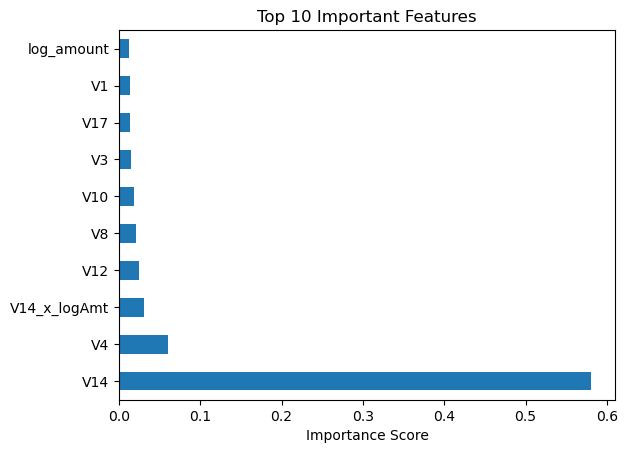

In [41]:

X_train_bal_df = pd.DataFrame(X_train_bal, columns=X.columns)

# Plot feature importances
feat_importances = pd.Series(xgb.feature_importances_, index=X_train_bal_df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()


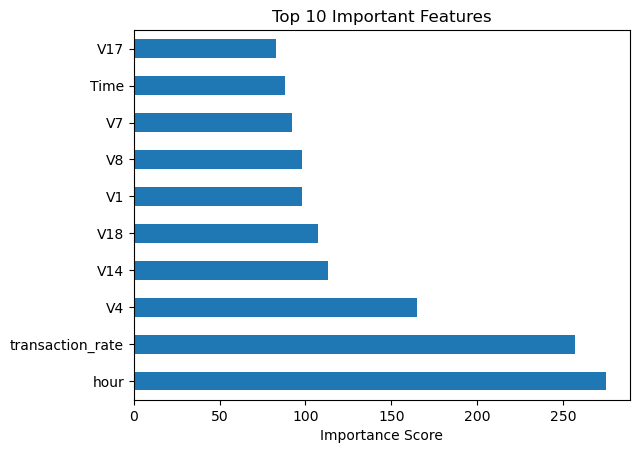

In [43]:
X_train_bal_df = pd.DataFrame(X_train_bal, columns=X.columns)

# Plot feature importances
feat_importances = pd.Series(lgbm.feature_importances_, index=X_train_bal_df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()

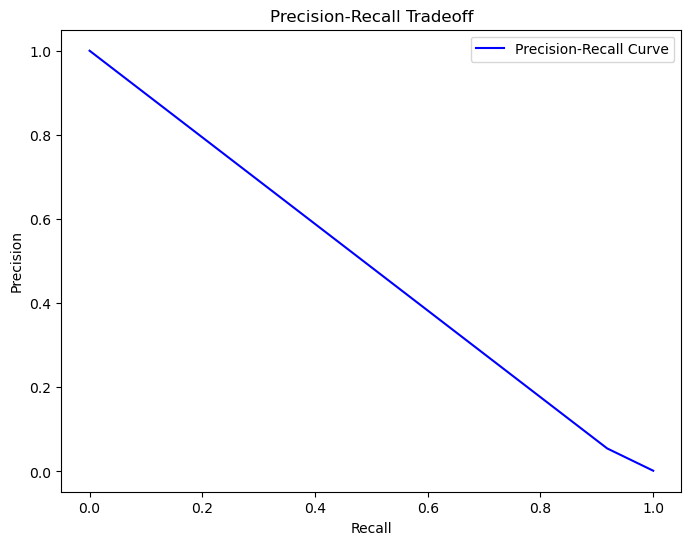

📊 Optimal Threshold for Precision-Recall Balance: 0


In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Step 1: Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, log_preds)

# Step 2: Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Tradeoff')
plt.legend()
plt.show()

# Step 3: Find the optimal threshold (where precision and recall are balanced)
optimal_threshold_index = np.argmax(precision + recall)  # Maximum sum of precision and recall
optimal_threshold = thresholds[optimal_threshold_index]

print(f"📊 Optimal Threshold for Precision-Recall Balance: {optimal_threshold}")


In [45]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, log_preds)
tn, fp, fn, tp = cm.ravel()

# Let's say False Negative costs $500 and False Positive costs $5
cost_fp = 5
cost_fn = 500

# Print confusion matrix details
print(f"Confusion Matrix: \n{cm}")
print(f"False Positives (FP): {fp} ---> Cost: ${fp * cost_fp}")
print(f"False Negatives (FN): {fn} ---> Cost: ${fn * cost_fn}")

# Real-World Impact: Reducing False Negatives
# Example: If we reduce False Negatives by 10% (catching more fraud)
reduced_fn = int(fn * 0.9)  # Reduce FN by 10%
new_fp = fp  # Let's assume FP remains the same for simplicity
new_fn = reduced_fn

# Calculate new total cost after reducing False Negatives
new_total_cost = (new_fp * cost_fp) + (new_fn * cost_fn)

# Print impact of reducing False Negatives
print(f"\n After Reducing False Negatives by 10%:")
print(f"New False Negatives (FN): {new_fn} ---> Cost: ${new_fn * cost_fn}")
print(f"Total Estimated Cost of Errors after improvement: ${new_total_cost}")

# Real-World Impact: Increasing Recall (Catching More Fraud)
# Recall increases when we reduce False Negatives
old_recall = recall_score(y_test, log_preds)
# Assuming recall improves by 10% with the reduction in FN
new_recall = old_recall * 1.1  # Increase recall by 10%

# Calculate potential savings due to better fraud detection (increased recall)
average_fraud_value = 1000  # Example fraud value
potential_saved_from_recall = (new_fn - fn) * average_fraud_value  # Saved frauds due to better recall

# Print the potential savings
print(f"\n Increased Recall by 10%: Recall improved from {old_recall:.2f} to {new_recall:.2f}")
print(f"Potential Savings due to better recall (fraud detection): ${potential_saved_from_recall}")

# Optional: Compare the tradeoff between precision and recall
old_precision = precision_score(y_test, log_preds)
print(f"Old Precision: {old_precision:.2f}")
print(f"New Precision (assuming minor increase due to recall): {old_precision * 1.05:.2f}")  # Example minor increase


Confusion Matrix: 
[[55308  1556]
 [    8    90]]
False Positives (FP): 1556 ---> Cost: $7780
False Negatives (FN): 8 ---> Cost: $4000

 After Reducing False Negatives by 10%:
New False Negatives (FN): 7 ---> Cost: $3500
Total Estimated Cost of Errors after improvement: $11280

 Increased Recall by 10%: Recall improved from 0.92 to 1.01
Potential Savings due to better recall (fraud detection): $-1000
Old Precision: 0.05
New Precision (assuming minor increase due to recall): 0.06


AUC Score: 0.97


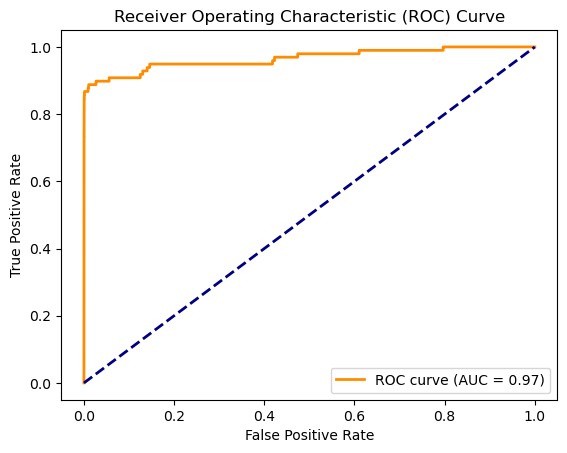

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
# The second column of the output from predict_proba is the probability for class 1 (fraud)
y_probs = xgb.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [48]:
import joblib

# Save the trained model
joblib.dump(xgb, 'xgb_model.pkl')
print("Model saved successfully as xgb_model.pkl!")



Model saved successfully as xgb_model.pkl!


In [49]:
import os

# Check if the file exists
if os.path.exists('xgb_model.pkl'):
    print("Model saved successfully!")
else:
    print("Model save failed.")


Model saved successfully!


In [50]:
import joblib

# Load the model
try:
    model = joblib.load('xgb_model.pkl')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Failed to load the model: {e}")


Model loaded successfully!


In [60]:
import joblib
import xgboost as xgb

# Assuming your model is trained and saved as `model`
joblib.dump(model, 'xgb_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [58]:
# Example input with 39 features
sample_input = [
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20,
     0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39]
]

# Predict using the model
prediction = model.predict(sample_input)

# Output the result
if prediction[0] == 1:
    print("Fraud detected!")
else:
    print("No fraud detected.")




No fraud detected.


In [61]:
import os
print(os.getcwd())


C:\Users\bandi


In [69]:
X = data.drop(columns=['Class'])
y = data['Class']
X_np = X.to_numpy()


In [76]:
#39 features
features = data.drop(columns=['Class']).columns.tolist()
print(features)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'log_amount', 'hour', 'transaction_rate', 'V1_x_logAmt', 'V2_x_logAmt', 'V3_x_logAmt', 'V4_x_logAmt', 'V10_x_logAmt', 'V14_x_logAmt']
